# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [0]:
#letsd just knock a bunch of imports out the way, I imagine I'll need all these
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

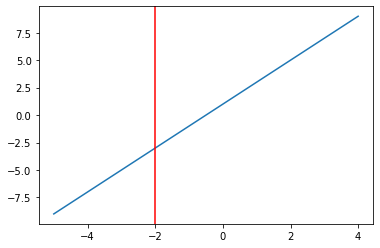

In [4]:
#engage easy mode
#lets just do a line for passed
x = np.arange(-5, 5)
y = 2 * x + 1
plt.plot(x,y)
plt.axvline(x = -2, color = 'r');


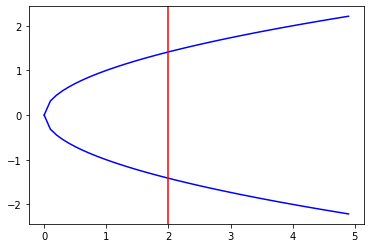

In [14]:
#well I know square roots fail the vertical line test
#I wonder how I'd do that.

x = np.arange(0, 5, .10)
ypos = np.sqrt(x)
yneg = - np.sqrt(x)
plt.plot(x, ypos, color = 'b')
plt.plot(x, yneg, color = 'b')

plt.axvline( x = 2, color = 'r');




## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

If you consider x an input, and a y your output, for it to be a function, each distinct input should generate a distinct output.  If your graph fails the veritcal line test, there may be multiple outputs (y values) for your input (x values).

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Relation 2 is a function.  The rest are not.  You can easily identify a function by checking the x values.  If there are duplicate x values, with different y values, then you'll fail a vertical line test.

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

Dimension of domain of m() = 3, 
Dimension of codomain of m() = 3, 
Dimension of domain of n() = 4, 
Dimension of codomain of n() = 2


## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

In [15]:
#I suppose so, it really just depends on my outputs
def o(a, b, c):

  return a + b, b + c, c + a, a * b * c

print(o(3, 4, 5))

(7, 9, 8, 60)


# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

In [0]:
#easy enough, I'll make functions for these, and build transformation matrix
#off of those.
def p(vect):
  x1 = vect[0][0]
  x2 = vect[1][0]

  row1 = np.array([x1 + (3 * x2)])
  row2 = np.array([(2 * x2) - x1])

  return np.array([row1, row2])

def q(vect):
  x1 = vect[0][0]
  x2 = vect[1][0]
  x3 = vect[2][0]

  row1 = np.array([(4 * x1) + x2 + (2 * x3)])
  row2 = np.array([(2 * x2) - x1 + (3 *x3)])
  row3 = np.array([(5 * x1) - (2 * x3) + x2])

  return np.array([row1, row2, row3])

In [22]:
#making transformation matrix for p
i_hat = np.array([[1],
                 [0]])
j_hat = np.array([[0],
                 [1]])

#lets give them the ol razzle dazzle
transformp = np.column_stack([p(i_hat), p(j_hat)])
print(transformp)

#okay just so I have this when I come back. I'm making a Transformation Matrix
#(aka a matrix that I can multiply vectors by, to get multidimensional functions
#output).  I am making this by passing in unit vectors (ihat, jhat) to my series
# of equations. The resulting vectors, can be combined into a transformation
#matrix.

[[ 1  3]
 [-1  2]]


In [30]:
p(i_hat)

array([[ 1],
       [-1]])

In [23]:
#lets make a transformation matrix for q
i_hat = np.array([[1],
                  [0],
                  [0]])
j_hat = np.array([[0],
                  [1],
                  [0]])
k_hat = np.array([[0],
                  [0],
                  [1]])

#Same as above, but for more dimensions

transformq = np.column_stack([q(i_hat), q(j_hat), q(k_hat)])
print(transformq)

[[ 4  1  2]
 [-1  2  3]
 [ 5  1 -2]]


## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [27]:
#proving out p
vect = np.array([[2],
                [3]])

print("This is our function output")
print(p(vect))
print("This is our transformation matrix output")
print(np.matmul(transformp, vect))

This is our function output
[[11]
 [ 4]]
This is our transformation matrix output
[[11]
 [ 4]]


In [29]:
#proving out q
vect2 = np.array([[2],
                  [3],
                  [4]])

print("This is our function output")
print(q(vect2))
print("This is our transformation matrix output")
print(np.matmul(transformq, vect2))

This is our function output
[[19]
 [16]
 [ 5]]
This is our transformation matrix output
[[19]
 [16]
 [ 5]]


# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

For transformation T, it's eigenvector is the vector that will not change directions when transformed by T.

The corresponding eigenvalue, is the scalar, that will scale our eigenvector to match the output of transformig our eigenvector.

There are lots of physics examples that make this make sense. A wheel rotating on a car, a vector following the axel isn't goint to be transformed.  In other words if the wheel goes forward, or backwards, the axel is doesn't change directions.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

Hard/impossible to visualize.  Too many dimensions can also be hard to conceptualize, people are only
good at thinking about so many things at a time. It can also make it hard to analyze if you have a large number of features to work through.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

Five times the observations of features.  But definitely shoot for more.

# Principal Component Analysis

## 7.1 Code for loading and cleaning the 2013 national dataset from the [Housing Affordability Data System (HADS)](https://www.huduser.gov/portal/datasets/hads/hads.html) --housing data, can be found below. 

## Perform PCA on the processed dataset `national_processed` (Make sure you standardize your data!) and then make a scatterplot of PC1 against PC2. Some of our discussion and work around PCA with this dataset will continue during tomorrow's lecture and assignment.

Not only does this dataset have decent amount columns to begin with (99), but in preparing the data for PCA we have also [one-hot-encoded](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f#targetText=One%20hot%20encoding%20is%20a,the%20entry%20in%20the%20dataset.) all of the categorical variables. This has the effect of creating a new column for each individual category of each categorical variable. After processing this dataset has 64738 columns. --Das a lot of columns.

Don't worry too much about the mechanics of one-hot encoding right now, you will learn and experiment with a whole bunch of categorical encoding approaches in unit 2. 

The code below will read in the dataset and perform the one-hot encoding of the categorical variables. Start adding your PCA code at the bottom of the provided code.

In [31]:
from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read Natinal Data 
national_url = 'https://www.huduser.gov/portal/datasets/hads/hads2013n_ASCII.zip'
national_file = 'thads2013n.txt'

if os.path.exists(national_file):
    national = pd.read_csv(national_file)
else: 
    z_national = urlopen(national_url)
    zip_national = ZipFile(BytesIO(z_national.read())).extract(national_file)
    national = pd.read_csv(zip_national)

print(national.shape)
national.head()

(64535, 99)


,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,'100003130103',82,'3','1',73738,956,15738,26213,40322,11067,2,2006,'1',1,40000,-6,'1',1,6,3117.394239,1,18021,'1',533,1,'1',169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0,-9,73738,15738,26213,40322,51616.6,20234.571429,...,4,72.898038,2,48.402635,2,290.250487,4,84.001102,2,37.077624,2,222.339102,4,64.346936,2,'1 Adequate','-5','2000-2009','1 Single Family','2 2BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','1 LTE 50% FMR','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','.','2 30% to 50%','-5','-5'
1,'100006110249',50,'5','3',55846,1100,17165,28604,45744,24218,4,1980,'1',1,130000,-6,'1',1,6,2150.725544,4,122961,'1',487,1,'1',245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000,-9,55846,17165,28604,45744,55846.0,19911.400000,...,4,120.424656,3,103.094063,6,275.768999,4,151.785764,3,65.388468,4,174.909320,3,96.271680,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','3 150-200% Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','3 GT FMR','4 60 - 80% AMI','4 60 - 80% AMI','6 100 - 120% AMI','4 60 - 80% AMI','7 120% AMI +','.','1 Less than 30%','-5','-5'
2,'100006370140',53,'5','3',55846,1100,13750,22897,36614,15470,4,1985,'1',1,150000,-6,'1',1,7,2213.789404,2,27974,'1',1405,1,'1',159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000,-9,55846,13750,22897,36614,44676.8,19937.500000,...,4,124.962016,3,109.452905,6,458.339239,4,161.147910,3,65.946449,4,276.153890,4,97.093197,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','4 60 - 80% AMI','5 80 - 100% AMI','6 100 - 120% AMI','4 60 - 80% AMI','4 60 - 80% AMI','.','3 50% or More','-5','-5'
3,'100006520140',67,'5','3',55846,949,13750,22897,36614,13964,3,1985,'1',1,200000,-6,'1',1,6,2364.585097,2,32220,'1',279,1,'1',179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,0,-9,55846,13750,22897,36614,44676.8,17875.000000,...,4,191.827492,3,161.926709,7,673.494512,4,247.752301,3,97.224801,5,404.382763,4,148.756610,3,'1 Adequate','-5','1980-1989','1 Single Family','3 3BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','6 100 - 120% AMI','7 120% AMI +','7 120% AMI +','5 80 - 100% AMI','4 60 - 80% AMI','.','1 Less than 30%','-5','-5'
4,'100007130148',26,'1','3',60991,737,14801,24628,39421,15492,2,1980,'1',1,-6,-6,'2',100,4,2314.524902,2,96874,'1',759,5,'2',146.000000,12.500000,759.000000,759.000000,759.000000,759.000000,96900,0,60991,14801,24628,39421,48792.8,16651.125000,...,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,55.308707,3,195.972115,3,102.98

In [32]:
# Look at datatypes
# a lot of object datatypes even though they seem to be strings of numbers.
national.dtypes

CONTROL            object
AGE1                int64
METRO3             object
REGION             object
LMED                int64
                    ...  
FMTINCRELAMICAT    object
FMTASSISTED        object
FMTBURDEN          object
FMTREGION          object
FMTSTATUS          object
Length: 99, dtype: object

In [33]:
# check for null values
national.isnull().sum().any()

False

In [34]:
# check for number of categorical vs numeric columns
cat_cols = national.columns[national.dtypes=='object']
num_cols = national.columns[national.dtypes!='object']

print(f'{len(cat_cols)} categorical columns')
print(f'{len(num_cols)} numerical columns')

32 categorical columns
67 numerical columns


In [35]:
# We're making a copy of our data in case we mess something up.
national_processed = national.copy()

# Categorically Encode our Variables:
# They need to all be numeric before we do PCA.
# https://pbpython.com/categorical-encoding.html

# Cast categorical columns to "category" data type
national_processed[cat_cols] = national_processed[cat_cols].astype('category')

national_processed.dtypes

CONTROL            category
AGE1                  int64
METRO3             category
REGION             category
LMED                  int64
                     ...   
FMTINCRELAMICAT    category
FMTASSISTED        category
FMTBURDEN          category
FMTREGION          category
FMTSTATUS          category
Length: 99, dtype: object

In [36]:
# Replace all category cell values with their numeric category codes
for col in cat_cols:
  national_processed[col] = national_processed[col].cat.codes

print(national_processed.shape)
national_processed.head()

(64535, 99)


,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,0,82,2,0,73738,956,15738,26213,40322,11067,2,2006,0,1,40000,-6,1,1,6,3117.394239,1,18021,1,533,1,0,169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0,-9,73738,15738,26213,40322,51616.6,20234.571429,...,4,72.898038,2,48.402635,2,290.250487,4,84.001102,2,37.077624,2,222.339102,4,64.346936,2,1,0,5,1,2,0,4,4,4,4,3,1,1,1,1,1,1,1,1,1,2,0,2,0,0
1,1,50,4,2,55846,1100,17165,28604,45744,24218,4,1980,0,1,130000,-6,1,1,6,2150.725544,4,122961,1,487,1,0,245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000,-9,55846,17165,28604,45744,55846.0,19911.400000,...,4,120.424656,3,103.094063,6,275.768999,4,151.785764,3,65.388468,4,174.909320,3,96.271680,2,1,0,3,1,4,0,3,4,4,3,4,2,2,2,1,3,3,3,5,3,7,0,1,0,0
2,2,53,4,2,55846,1100,13750,22897,36614,15470,4,1985,0,1,150000,-6,1,1,7,2213.789404,2,27974,1,1405,1,0,159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000,-9,55846,13750,22897,36614,44676.8,19937.500000,...,4,124.962016,3,109.452905,6,458.339239,4,161.147910,3,65.946449,4,276.153890,4,97.093197,2,1,0,3,1,4,0,4,4,4,4,3,2,2,2,1,2,3,4,5,3,4,0,3,0,0
3,3,67,4,2,55846,949,13750,22897,36614,13964,3,1985,0,1,200000,-6,1,1,6,2364.585097,2,32220,1,279,1,0,179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,0,-9,55846,13750,22897,36614,44676.8,17875.000000,...,4,191.827492,3,161.926709,7,673.494512,4,247.752301,3,97.224801,5,404.382763,4,148.756610,3,1,0,3,1,3,0,4,4,4,4,4,2,2,2,2,2,5,6,6,4,4,0,1,0,0
4,4,26,0,2,60991,737,14801,24628,39421,15492,2,1980,0,1,-6,-6,2,100,4,2314.524902,2,96874,1,759,5,1,146.000000,12.500000,759.000000,759.000000,759.000000,759.000000,96900,0,60991,14801,24628,39421,48792.8,16651.125000,...,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,1,1,3,5,2,1,3,3,3,3,4,2,2,2,2,3,2,2,2,2,7,1,1,0,0


In [37]:
# Now we only ahve numeric columns (ints and floats)
national_processed.dtypes

CONTROL            int32
AGE1               int64
METRO3              int8
REGION              int8
LMED               int64
                   ...  
FMTINCRELAMICAT     int8
FMTASSISTED         int8
FMTBURDEN           int8
FMTREGION           int8
FMTSTATUS           int8
Length: 99, dtype: object

In [43]:
#okay lets start by normalizing. Since we aren't looking for a specific relation
#we won't be taking any columns out for our analysis.

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

x = national_processed.values
x = StandardScaler().fit_transform(x)

#verify if normalized
print(round(np.mean(x)))
print(np.std(x))

#I'm assuming that is close enough to 1 to count as 1 for standard dev.

0.0
0.9949366763261824


In [44]:
#lets make this into a dataframe now
normal_national = pd.DataFrame(x, columns = national_processed.columns)
normal_national.head()

,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,-1.732024,1.488075,0.608784,-1.327872,0.454953,-0.528766,-0.444470,-0.445262,-0.553127,-0.681429,-0.603700,1.504196,-0.271749,-0.142292,-0.409728,-0.26814,-0.518234,-0.253701,0.193641,0.989256,-0.345248,-0.582421,-0.001189,-0.538157,-0.626460,-0.858681,-0.108318,1.002403,-0.524572,-0.489431,-0.511002,-0.535753,-0.693001,-0.774303,0.454953,-0.444470,-0.445262,-0.553127,-0.100276,-0.139349,...,0.448213,-0.508180,-0.588115,-0.524716,-1.139197,-0.294200,0.432580,-0.487463,-0.685212,-0.580668,-0.896546,-0.272848,0.472927,-0.526199,-0.452728,-0.001189,-0.706647,1.728565,-0.627170,-0.612264,-0.858681,0.676610,0.649838,0.615731,0.703541,0.071352,-0.518776,-0.588115,-0.685212,-0.452728,-1.091609,-0.956874,-1.028145,-1.139197,-0.896546,-0.779119,-0.709278,0.549473,-0.462107,0.0
1,-1.731970,0.088812,2.184270,0.576698,-0.991324,-0.163391,-0.123184,-0.122457,-0.043566,1.140132,1.224839,0.515773,-0.271749,-0.142292,-0.048319,-0.26814,-0.518234,-0.253701,0.193641,0.213178,0.823743,0.827974,-0.001189,-0.584987,-0.626460,-0.858681,0.478101,-0.065553,-0.214100,-0.155728,-0.190289,-0.235410,1.204959,-0.774303,-0.991324,-0.123184,-0.122457,-0.043566,0.108920,-0.207233,...,0.448213,-0.135192,0.796007,-0.102732,0.682587,-0.316521,0.432580,-0.084420,0.716067,-0.203481,0.115986,-0.399199,0.167739,-0.199905,-0.452728,-0.001189,-0.706647,0.467274,-0.627170,1.390040,-0.858681,-0.080937,0.649838,0.615731,-0.052382,0.778350,0.859820,0.796007,0.716067,-0.452728,0.926091,0.024966,-0.077478,0.682587,0.115986,1.171883,-0.709278,-0.544709,-0.462107,0.0
2,-1.731917,0.219993,2.184270,0.576698,-0.991324,-0.163391,-0.892063,-0.892949,-0.901606,-0.071564,1.224839,0.705854,-0.271749,-0.142292,0.031993,-0.26814,-0.518234,-0.253701,0.718708,0.263808,0.044416,-0.448652,-0.001189,0.349585,-0.626460,-0.858681,-0.185141,-0.208710,-0.198696,-0.116072,-0.164791,-0.229295,-0.260945,-0.774303,-0.991324,-0.892063,-0.892949,-0.901606,-0.443533,-0.201751,...,0.448213,-0.099583,0.796007,-0.053669,0.682587,-0.035118,0.432580,-0.028753,0.716067,-0.196046,0.115986,-0.129488,0.472927,-0.191508,-0.452728,-0.001189,-0.706647,0.467274,-0.627170,1.390040,-0.858681,0.676610,0.649838,0.615731,0.703541,0.071352,0.859820,0.796007,0.716067,-0.452728,-0.082759,0.024966,0.397856,0.682587,0.115986,0.001282,-0.709278,1.643655,-0.462107,0.0
3,-1.731863,0.832170,2.184270,0.576698,-0.991324,-0.546527,-0.892063,-0.892949,-0.901606,-0.280162,0.310570,0.705854,-0.271749,-0.142292,0.232776,-0.26814,-0.518234,-0.253701,0.193641,0.384872,0.044416,-0.391586,-0.001189,-0.796742,-0.626460,-0.858681,-0.031494,0.019197,0.031870,0.106710,0.062991,0.003272,-0.693001,-0.774303,-0.991324,-0.892063,-0.892949,-0.901606,-0.443533,-0.634993,...,0.448213,0.425176,0.796007,0.351204,1.138032,0.296510,0.432580,0.486190,0.716067,0.220677,0.622252,0.212108,0.472927,0.336529,0.923669,-0.001189,-0.706647,0.467274,-0.627170,0.388888,-0.858681,0.676610,0.649838,0.615731,0.703541,0.778350,0.859820,0.796007,0.716067,0.923669,-0.082759,1.006807,1.348523,1.138032,0.622252,0.001282,-0.709278,-0.544709,-0.462107,0.0
4,-1.731809,-0.960634,-0.966702,0.5

In [45]:
#getting the PCA class ready
pca_national = PCA(n_components = 2)

pca_data = pca_national.fit_transform(x)

#confirm we reduced down to 2 columns
print(national_processed.shape)
print(pca_data.shape)

(64535, 99)
(64535, 2)


In [46]:
#making a data fram with the PCA for all the samples
national_final = pd.DataFrame(data = pca_data, columns = ['comp_1', 'comp_2'])

national_final.head(3)

,comp_1,comp_2
0,-2.576570,-1.376127
1,2.040643,-0.988061
2,1.215270,0.370168


In [49]:
#Oh boy, more lost info than not.
1 - sum(pca_national.explained_variance_ratio_)

0.5150729480252

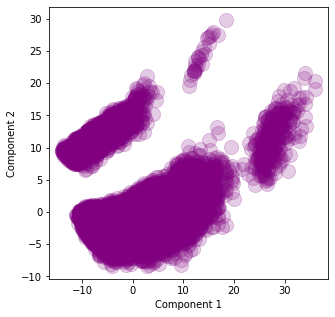

In [54]:
#lets plot it and see what we have
fig, ax = plt.subplots(figsize = (5, 5))
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.scatter(x = national_final['comp_1'],
              y = national_final['comp_2'],
              s = 200,
              alpha = .2,
              color = 'purple')
plt.legend;

# Stretch Goals

## 1) Perform further data exploration on the HADS national dataset (the version before we one-hot encoded it) Make scatterplots and see if you can see any resemblance between the original scatterplots and the plot of the principal components that you made in 7.1. 

(You may or may not not see very much resemblance depending on the variables you choose, and that's ok!)

## 2) Study "Scree Plots" and then try and make one for your PCA dataset. How many principal conponents do you need to retain in order for your PCs to contain 90% of the explained variance? 

We will present this topic formally at the beginning of tomorrow's lecture, so if you figure this stretch goal out, you're ahead of the game. 

## 3) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

Prioritize self-study over this stretch goal if you are not semi-comfortable with the topics of PCA, Eigenvalues, and Eigenvectors.

![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)